## VC_2_Lab_14_Face_Recognition_Dlib

Neste jupyter vamos fazer uso do Dlib (http://dlib.net/) e a biblioteca https://pypi.org/project/face-recognition/ para reconhecimento e comparação de faces em imagens.

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) devendo o aluno carregar as imagens que estão compactadas no ZIP **Laboratório/face_recognition.zip** na pasta **VC_1/face_recognition/** dentro do seu Google Drive

### Visão Computacional 2

### Prof: José Humberto Cruvinel

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

In [47]:
!pip install face-recognition

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Execute esta linha para conferir que seu Google Drive está devidamente montado (deve aparecer a pasta 'drive')

%ls -la

total 2728
-rw------- 1 root root  108688 Nov 21 00:28 bradley.jpg
-rw------- 1 root root  494696 Nov 21 00:26 jennifer.jpg
-rw------- 1 root root   79350 Nov 21 18:13 novaFoto1.jpg
-rw------- 1 root root   66438 Nov 21 18:14 novaFoto2.jpg
-rw------- 1 root root   51438 Nov 21 18:14 novaFoto4.jpg
-rw------- 1 root root   44370 Nov 21 19:26 novaFoto7.jpg
-rw------- 1 root root   71013 Nov 21 19:27 novaFoto8.jpg
-rw------- 1 root root   39857 Nov 20 21:55 photo1.jpg
-rw------- 1 root root  269102 Nov 20 22:16 photo2.jpg
-rw------- 1 root root 1226020 Nov 20 22:18 photo3.jpg
-rw------- 1 root root  106072 Nov 20 22:19 photo4.jpg
-rw------- 1 root root  196487 Nov 20 22:20 photo5.jpg
-rw------- 1 root root   36510 Nov 20 23:53 photo6.jpg


In [50]:
# Entrando no diretório

%cd /content/drive/MyDrive/Colab Notebooks/face_recognition

/content/drive/MyDrive/Colab Notebooks/face_recognition


In [51]:
# Listando o conteúdo

%ls -la

total 2728
-rw------- 1 root root  108688 Nov 21 00:28 bradley.jpg
-rw------- 1 root root  494696 Nov 21 00:26 jennifer.jpg
-rw------- 1 root root   79350 Nov 21 18:13 novaFoto1.jpg
-rw------- 1 root root   66438 Nov 21 18:14 novaFoto2.jpg
-rw------- 1 root root   51438 Nov 21 18:14 novaFoto4.jpg
-rw------- 1 root root   44370 Nov 21 19:26 novaFoto7.jpg
-rw------- 1 root root   71013 Nov 21 19:27 novaFoto8.jpg
-rw------- 1 root root   39857 Nov 20 21:55 photo1.jpg
-rw------- 1 root root  269102 Nov 20 22:16 photo2.jpg
-rw------- 1 root root 1226020 Nov 20 22:18 photo3.jpg
-rw------- 1 root root  106072 Nov 20 22:19 photo4.jpg
-rw------- 1 root root  196487 Nov 20 22:20 photo5.jpg
-rw------- 1 root root   36510 Nov 20 23:53 photo6.jpg


Encontrando as faces

In [52]:
import face_recognition
image_1 = face_recognition.load_image_file('photo1.jpg')
face_locations = face_recognition.face_locations(image_1)
face_locations

[(149, 335, 211, 273),
 (41, 525, 84, 482),
 (184, 418, 246, 356),
 (26, 440, 78, 389),
 (49, 308, 101, 256),
 (87, 252, 149, 190),
 (135, 501, 198, 439),
 (22, 347, 65, 304),
 (124, 268, 176, 216)]

In [53]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
def mark_faces(image, locations):
    plt.imshow(image)
    ax = plt.gca()
    # para cada face, imprime um retangulo
    for location in locations:
        top, right, bottom, left = location
        face_border = Rectangle((left, top), right-left, bottom-top, fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

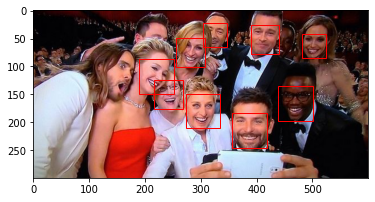

In [54]:
# Marcando as faces
mark_faces(image_1, face_locations)

Encontrando os Landmarks

In [55]:
import face_recognition
# Neste exemplo vamos imprimir os face landmarks (pontos de interesse na face)
image = face_recognition.load_image_file("jennifer.jpg")
face_landmarks_list = face_recognition.face_landmarks(image)
face_landmarks_list

[{'bottom_lip': [(1367, 1610),
   (1266, 1731),
   (1170, 1779),
   (1101, 1783),
   (1026, 1769),
   (930, 1706),
   (839, 1580),
   (881, 1601),
   (1032, 1701),
   (1104, 1716),
   (1171, 1711),
   (1324, 1626)],
  'chin': [(550, 1087),
   (564, 1247),
   (585, 1402),
   (607, 1556),
   (660, 1697),
   (751, 1818),
   (854, 1925),
   (976, 2020),
   (1102, 2052),
   (1231, 2020),
   (1360, 1925),
   (1473, 1822),
   (1564, 1704),
   (1619, 1570),
   (1640, 1422),
   (1658, 1274),
   (1671, 1122)],
  'left_eye': [(788, 1147),
   (851, 1118),
   (927, 1123),
   (986, 1176),
   (914, 1184),
   (842, 1178)],
  'left_eyebrow': [(664, 1029),
   (745, 986),
   (843, 980),
   (939, 999),
   (1028, 1044)],
  'nose_bridge': [(1131, 1153), (1128, 1260), (1123, 1366), (1119, 1472)],
  'nose_tip': [(1013, 1504),
   (1061, 1523),
   (1114, 1548),
   (1170, 1530),
   (1223, 1515)],
  'right_eye': [(1272, 1187),
   (1329, 1138),
   (1403, 1136),
   (1467, 1170),
   (1408, 1199),
   (1336, 1199)],
 

Comparando faces

In [56]:
import face_recognition
image1 = face_recognition.load_image_file("jennifer.jpg")
image2 = face_recognition.load_image_file("bradley.jpg")
encoding1 = face_recognition.face_encodings(image1)[0]
encoding2 = face_recognition.face_encodings(image2)[0]
# Neste exemplo estamos verificando se as pessoas sao iguais
results = face_recognition.compare_faces([encoding1], encoding2)
print(results)

[False]


In [57]:
# Neste outro exemplo, imprimimos a distância entre as faces
matches = face_recognition.face_distance([encoding1], encoding2)
print('Face distance =',matches[0])

Face distance = 0.9439208341768721


photo1.jpg
Comparing files photo1.jpg and photo2.jpg
Comparing files photo1.jpg and photo3.jpg
Comparing files photo1.jpg and photo4.jpg
Comparing files photo1.jpg and photo5.jpg
Face Distance =  [0.48365715]


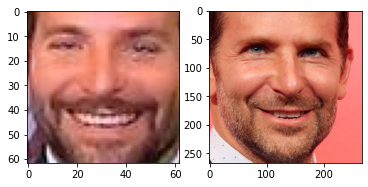

Comparing files photo1.jpg and photo6.jpg
Comparing files photo1.jpg and jennifer.jpg
Comparing files photo1.jpg and bradley.jpg
Face Distance =  [0.4375755]


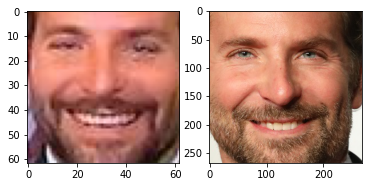

Comparing files photo1.jpg and novaFoto1.jpg
Comparing files photo1.jpg and novaFoto4.jpg
Comparing files photo1.jpg and novaFoto2.jpg
Comparing files photo1.jpg and novaFoto8.jpg
Comparing files photo1.jpg and novaFoto7.jpg
photo2.jpg
Comparing files photo2.jpg and photo3.jpg
Comparing files photo2.jpg and photo4.jpg
Comparing files photo2.jpg and photo5.jpg
Comparing files photo2.jpg and photo6.jpg
Comparing files photo2.jpg and jennifer.jpg
Comparing files photo2.jpg and bradley.jpg
Comparing files photo2.jpg and novaFoto1.jpg
Comparing files photo2.jpg and novaFoto4.jpg
Comparing files photo2.jpg and novaFoto2.jpg
Comparing files photo2.jpg and novaFoto8.jpg
Comparing files photo2.jpg and novaFoto7.jpg
photo3.jpg
Comparing files photo3.jpg and photo4.jpg
Face Distance =  [0.48867864]


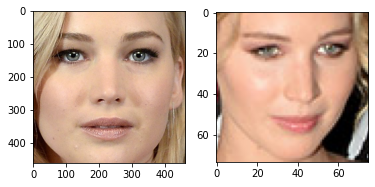

Comparing files photo3.jpg and photo5.jpg
Comparing files photo3.jpg and photo6.jpg
Comparing files photo3.jpg and jennifer.jpg
Face Distance =  [0.43629303]


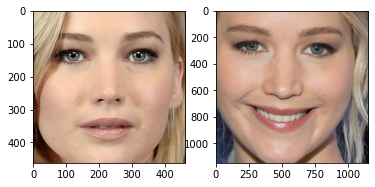

Comparing files photo3.jpg and bradley.jpg
Comparing files photo3.jpg and novaFoto1.jpg
Comparing files photo3.jpg and novaFoto4.jpg
Comparing files photo3.jpg and novaFoto2.jpg
Comparing files photo3.jpg and novaFoto8.jpg
Comparing files photo3.jpg and novaFoto7.jpg
photo4.jpg
Comparing files photo4.jpg and photo5.jpg
Comparing files photo4.jpg and photo6.jpg
Comparing files photo4.jpg and jennifer.jpg
Face Distance =  [0.39955873]


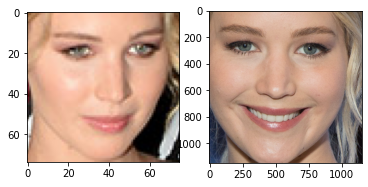

Comparing files photo4.jpg and bradley.jpg
Comparing files photo4.jpg and novaFoto1.jpg
Comparing files photo4.jpg and novaFoto4.jpg
Comparing files photo4.jpg and novaFoto2.jpg
Comparing files photo4.jpg and novaFoto8.jpg
Comparing files photo4.jpg and novaFoto7.jpg
photo5.jpg
Comparing files photo5.jpg and photo6.jpg
Comparing files photo5.jpg and jennifer.jpg
Comparing files photo5.jpg and bradley.jpg
Face Distance =  [0.37069031]


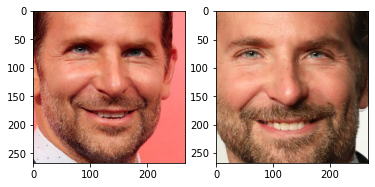

Comparing files photo5.jpg and novaFoto1.jpg
Comparing files photo5.jpg and novaFoto4.jpg
Comparing files photo5.jpg and novaFoto2.jpg
Comparing files photo5.jpg and novaFoto8.jpg
Comparing files photo5.jpg and novaFoto7.jpg
photo6.jpg
Comparing files photo6.jpg and jennifer.jpg
Face Distance =  [0.4775992]


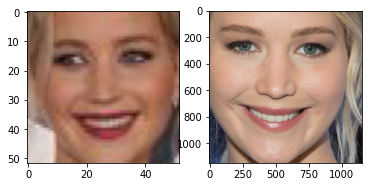

Comparing files photo6.jpg and bradley.jpg
Comparing files photo6.jpg and novaFoto1.jpg
Comparing files photo6.jpg and novaFoto4.jpg
Comparing files photo6.jpg and novaFoto2.jpg
Comparing files photo6.jpg and novaFoto8.jpg
Comparing files photo6.jpg and novaFoto7.jpg
jennifer.jpg
Comparing files jennifer.jpg and bradley.jpg
Comparing files jennifer.jpg and novaFoto1.jpg
Comparing files jennifer.jpg and novaFoto4.jpg
Comparing files jennifer.jpg and novaFoto2.jpg
Comparing files jennifer.jpg and novaFoto8.jpg
Comparing files jennifer.jpg and novaFoto7.jpg
bradley.jpg
Comparing files bradley.jpg and novaFoto1.jpg
Comparing files bradley.jpg and novaFoto4.jpg
Comparing files bradley.jpg and novaFoto2.jpg
Comparing files bradley.jpg and novaFoto8.jpg
Comparing files bradley.jpg and novaFoto7.jpg
novaFoto1.jpg
Comparing files novaFoto1.jpg and novaFoto4.jpg
Comparing files novaFoto1.jpg and novaFoto2.jpg
Comparing files novaFoto1.jpg and novaFoto8.jpg
Face Distance =  [0.49817407]


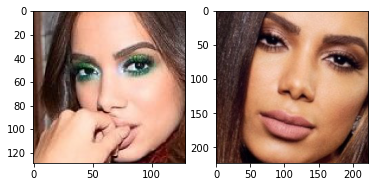

Comparing files novaFoto1.jpg and novaFoto7.jpg
Face Distance =  [0.51448223]


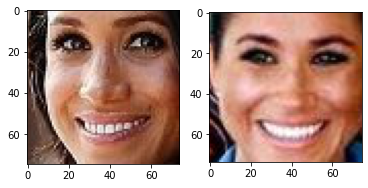

novaFoto4.jpg
Comparing files novaFoto4.jpg and novaFoto2.jpg
Comparing files novaFoto4.jpg and novaFoto8.jpg
Comparing files novaFoto4.jpg and novaFoto7.jpg
novaFoto2.jpg
Comparing files novaFoto2.jpg and novaFoto8.jpg
Comparing files novaFoto2.jpg and novaFoto7.jpg
novaFoto8.jpg
Comparing files novaFoto8.jpg and novaFoto7.jpg
novaFoto7.jpg
Done!


In [59]:
# Agora com todas as imagens
import os
THRESHOLD = 0.52
def compare_images(path):
  done = []
  for filename_x in os.listdir(path):
    print(filename_x)
    image1 = face_recognition.load_image_file(filename_x)
    faces1 = face_recognition.face_locations(image1)
    encoding1 = face_recognition.face_encodings(image1)

    for filename_y in os.listdir(path):
      if (filename_x != filename_y and '{}_{}'.format(filename_y,filename_x) not in done):
        done.append('{}_{}'.format(filename_x,filename_y))
        print('Comparing files {} and {}'.format(filename_x,filename_y))

        image2 = face_recognition.load_image_file(filename_y)
        faces2 = face_recognition.face_locations(image2)
        encoding2 = face_recognition.face_encodings(image2)

        for idx, face_encoding_1 in enumerate(encoding1):
          for idy, face_encoding_2 in enumerate(encoding2):
            face_distance = face_recognition.face_distance([face_encoding_1], face_encoding_2)
            if (face_distance < THRESHOLD):
              print('Face Distance = ',face_distance)
              f = plt.figure()
              f.add_subplot(1,2, 1)
              top, rigth, bottom, left = faces1[idx]
              plt.imshow(image1[top:bottom, left:rigth])
              f.add_subplot(1,2, 2)
              top, rigth, bottom, left = faces2[idy]
              plt.imshow(image2[top:bottom, left:rigth])
              plt.show(block=True)  
  print('Done!')        
compare_images('.')      

# Exercício 14.1

Veja que no exercício acima estamos imprimindo toda a imagem quando encontramos faces iguais. 

Melhore essa implementação para que somente as faces sejam imprimidas.

Adicione novas imagens e ajuste o valor do THRESHOLD. Qual o melhor valor?


**R.:** Nesse contexto, o melhor limiar foi de **0.52**, que pegou corretamente as novas imagens.

FIM